<h1>  Project of DDML </h1>

<h3>Author :</h3>
    <ul>
    <li> 
    Thibault POUX
    </li> 
    <li> 
    Pablo García
    </li> 
    <li> 
    Nabil Kaci 
    </li> 
    </ul>

<style>
.container {
    display: flex;
    flex-wrap: wrap;
    justify-content: center;
}

.image-group {
    display: flex;
    flex-direction: row;
    align-items: center;
    margin-bottom: 20px;
}

.image-box img {
    width: 300px; /* Adjust the width as needed */
    height: 300px; /* Adjust the height as needed */
    object-fit: cover;
}

.image-box img {
    max-width: 100%;
    height: auto;
}

.summary {
    margin-top: 20px;
}



.summary li {
    margin-bottom: 10px;
}
</style>

<div class="container">
    <div class="title">
        <h2>MRI Images of brain:</h2>
    </div>
    <div class="image-group">
        <div class="image-box">
            <img src="Dataset\no\no_3.jpg" alt="Image 1">
        </div>
        <div class="image-box">
            <img src="Dataset\no\no_78.jpg" alt="Image 2">
        </div>
    </div>
</div>

<div class="container">
    <div class="title">
        <h2>MRI Images for brain with a tumor:</h2>
    </div>
    <div class="image-group">
        <div class="image-box">
            <img src="Dataset\yes\yes_2.jpg" alt="Image 3">
        </div>
        <div class="image-box">
            <img src="Dataset\yes\yes_12.jpg" alt="Image 4">
        </div>
    </div>
</div>


<div class="summary">
    <h2>Summary</h2>
    <ul>
        <li>Number of cancer images: 155</li>
        <li>Number of non-cancer images: 98</li>
        <li>Link to dataset page: <a href="https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection">Kaggle.com</a></li>
    </ul>
</div>

In [1]:

#all import 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import time

import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate


#homemade package
from codigo.prep_data import data_proccesing
from codigo.prep_data import data_preProcessing

# preporcessing the data if needed
data_preProcessing.run()

#import the data
X_flatten, Y_flatten = data_proccesing.load_data_flatten()




Quadratic Model

In [2]:
# Variables
r_state = [914, 895, 365, 264, 39, 500, 129]
pourcentage_of_test_data = 0.33

c:\Users\thiba\OneDrive\Documents\Ecole\UV\L3\Semestre 2\Info\Data minning\MLLD-2024-NPT\myvenv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\thiba\OneDrive\Documents\Ecole\UV\L3\Semestre 2\Info\Data minning\MLLD-2024-NPT\myvenv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\thiba\OneDrive\Documents\Ecole\UV\L3\Semestre 2\Info\Data minning\MLLD-2024-NPT\myvenv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\thiba\OneDrive\Documents\Ecole\UV\L3\Semestre 2\Info\Data minning\MLLD-2024-NPT\myvenv\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\thiba\OneDrive\Documents\Ecole\UV\L3\Semestre 2\Info\Data minni

Average of the different models, for 7 different test, with 33.0% of the data used the test set.
+---------------------------------+------------+------------------+---------------+-------------------+
| Model                           |   F1 Score | False negative   |   Time to fit |   Time to predict |
+=================================+============+==================+===============+===================+
| Quadratic Discriminant Analysis |       0.6  | 27.21%           |    0.361728   |        0.0348862  |
+---------------------------------+------------+------------------+---------------+-------------------+
| K-Nearest Neighbors             |       0.73 | 22.45%           |    0.00224706 |        0.028822   |
+---------------------------------+------------+------------------+---------------+-------------------+
| Multi-Layer Perceptron          |       0.76 | 0.34%            |    0.418556   |        0.00562038 |
+---------------------------------+------------+------------------+----

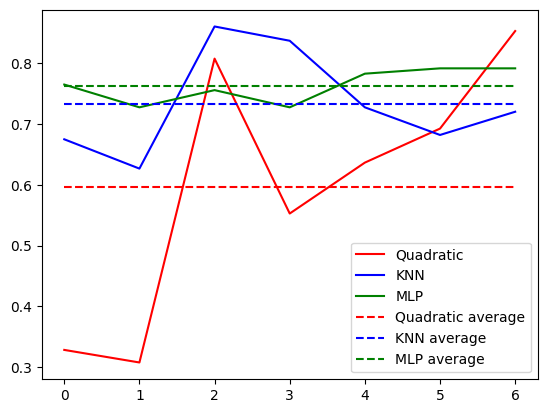

In [3]:
# specified all the models
reg_Quadra = QuadraticDiscriminantAnalysis()
reg_KNN = KNeighborsClassifier(n_neighbors=3)
reg_MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3, 3))

pretty_Names = {'quadra':'Quadratic Discriminant Analysis', 'knn':'K-Nearest Neighbors', 'mlp':'Multi-Layer Perceptron'}
data = {'quadra':{}, 'knn':{}, 'mlp':{}}
for key in data.keys():
    data[key]['f1'] = []
    data[key]['false_negatif'] = []
    data[key]['time_fit'] = 0
    data[key]['time_predict'] = 0

for int_state in r_state:

    # make the sample with ouldout
    X_train, X_test, Y_train, Y_test = train_test_split(X_flatten, Y_flatten, test_size=pourcentage_of_test_data, random_state=int_state)

    for reg, name in zip([reg_Quadra, reg_KNN, reg_MLP], data.keys()): #loop over the models
        start_time = time.time()
        reg = reg.fit(X_train, Y_train)
        end_fit = time.time()
        result = reg.predict(X_test)
        end_predict = time.time()
        
        # save results
        data[name]['f1'].append(f1_score(Y_test, result))
        data[name]['false_negatif'].append(confusion_matrix(Y_test, result).ravel()[2])
        data[name]['time_fit'] += end_fit - start_time
        data[name]['time_predict'] += end_predict - end_fit


# part to display the results

# print the results in a table
output_data = []
for key in data.keys():
    name = pretty_Names.get(key)
    f1 = np.mean(data[key]['f1']).round(2)
    f_neg = str((np.mean(data[key]['false_negatif'])/len(Y_test)*100).round(2)) + '%'
    time_fit = (data[key]['time_fit']/len(r_state))
    time_predict = (data[key]['time_predict']/len(r_state))
    output_data.append([name, f1, f_neg, time_fit, time_predict])
    
    
print(f"Average of the different models, for {len(r_state)} different test, with {pourcentage_of_test_data*100}% of the data used the test set.") 

print(tabulate(output_data, headers=['Model', 'F1 Score', 'False negative', 'Time to fit', 'Time to predict'], tablefmt='grid'))


# plot a graph of the score for each model and for each iterration with a other curve for the average
plt.plot(data['quadra']['f1'], label='Quadratic', color='red')
plt.plot(data['knn']['f1'], label='KNN', color='blue')
plt.plot(data['mlp']['f1'], label='MLP', color='green')
plt.plot([sum(data['quadra']['f1'])/len(data['quadra']['f1'])]*len(data['quadra']['f1']), label='Quadratic average',   color='red', linestyle='--')
plt.plot([sum(data['knn']['f1'])/len(data['knn']['f1'])]*len(data['knn']['f1']), label='KNN average', color='blue', linestyle='--')
plt.plot([sum(data['mlp']['f1'])/len(data['mlp']['f1'])]*len(data['mlp']['f1']), label='MLP average', color='green', linestyle='--')
plt.legend()
plt.show()
